KNN Accuracy: 0.99
SVM Accuracy: 0.98
Decision Tree Accuracy: 0.69


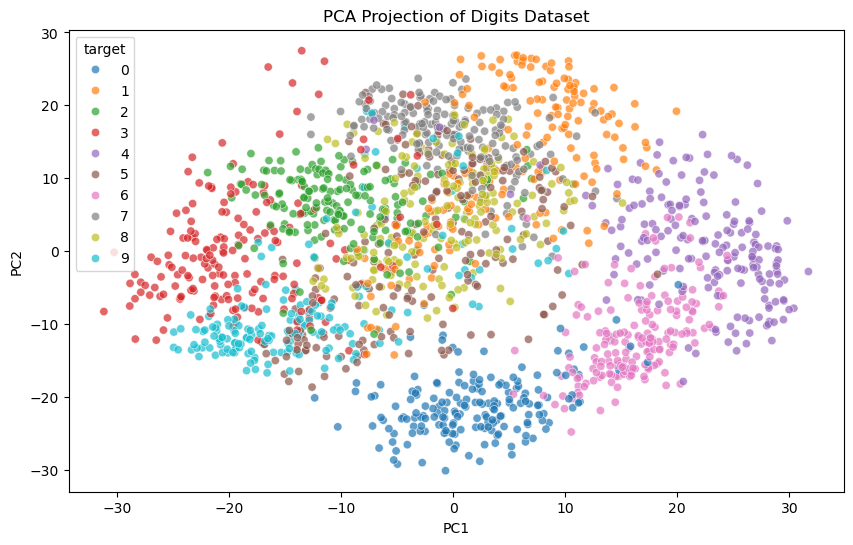

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.96      0.99      0.97        72
           2       1.00      1.00      1.00        66
           3       0.99      0.97      0.98        71
           4       0.97      1.00      0.99        78
           5       0.98      0.98      0.98        83
           6       1.00      1.00      1.00        69
           7       0.99      0.99      0.99        71
           8       0.98      0.94      0.96        65
           9       0.97      0.97      0.97        77

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719

Confusion Matrix:


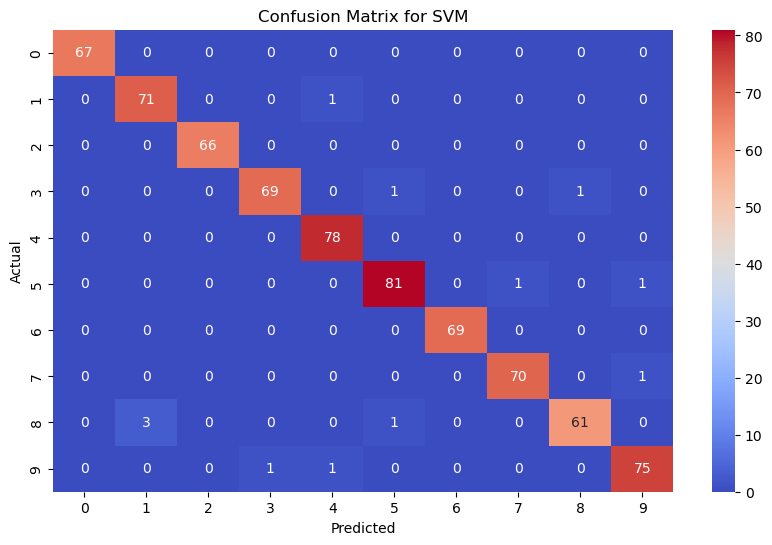

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Digits dataset
digits = datasets.load_digits()
X = digits.data  # Features
y = digits.target  # Target labels

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_accuracy = knn.score(X_test, y_test)
print(f'KNN Accuracy: {knn_accuracy:.2f}')

# Support Vector Machine Classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
svm_accuracy = svm.score(X_test, y_test)
print(f'SVM Accuracy: {svm_accuracy:.2f}')

# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
dt_accuracy = dt.score(X_test, y_test)
print(f'Decision Tree Accuracy: {dt_accuracy:.2f}')

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=df_pca['target'], palette='tab10', data=df_pca, alpha=0.7)
plt.title('PCA Projection of Digits Dataset')
plt.show()

# Confusion Matrix and Classification Report
y_pred = svm.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
